In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [2]:
breeds = pd.read_table('data.txt')
breeds.head()

,breed_label,breed_name,breed_subtype,mass,length,height,color
0,1,labrador,male,32.0,95.0,58.0,0.55
1,1,labrador,male,34.0,97.0,60.0,0.59
2,1,labrador,male,31.0,100.0,59.3,0.60
3,2,Bulldogs,male,8.5,48.5,40.7,0.80
4,2,Bulldogs,male,7.3,49.2,41.6,0.79


In [3]:
breeds.tail()

,breed_label,breed_name,breed_subtype,mass,length,height,color
54,4,boxers,unknown,31.6,78.1,78.5,0.71
55,4,boxers,unknown,31.6,79.3,77.7,0.72
56,4,boxers,unknown,31.6,85.9,79.1,0.73
57,4,boxers,unknown,35.2,86.5,80.5,0.72
58,4,boxers,unknown,31.8,86.1,81.1,0.70


In [4]:
look_up_breed_name = dict(zip(breeds.breed_label.unique(), breeds.breed_name.unique()))
look_up_breed_name

{1: 'labrador',
 2: 'Bulldogs',
 5: 'german shepherd',
 3: 'poodles ',
 6: 'beagles ',
 4: 'boxers  '}

In [5]:
breeds.shape

(59, 7)

<IPython.core.display.Javascript object>


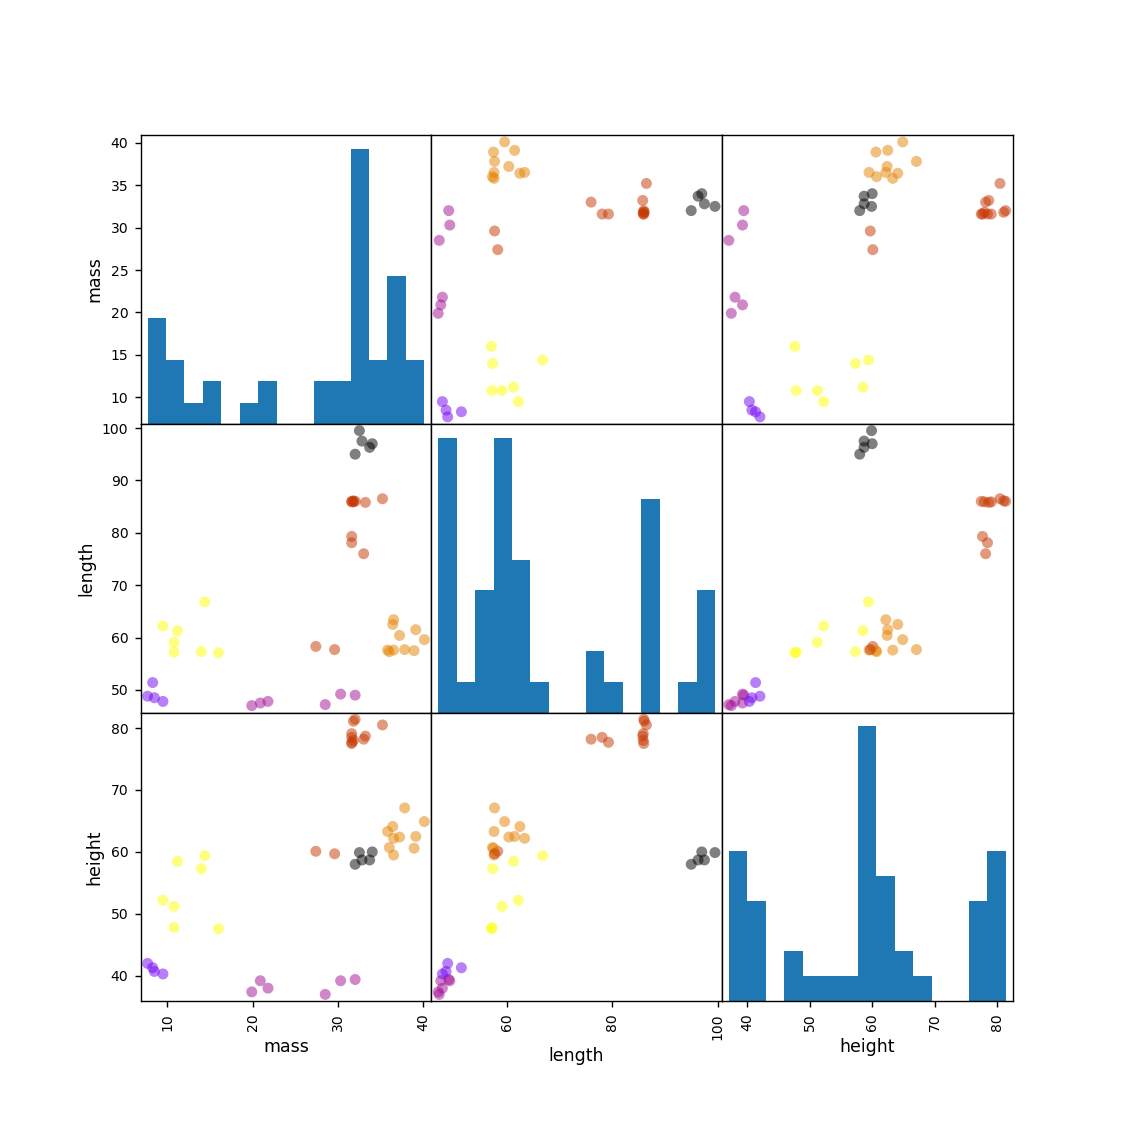

In [6]:
X = breeds[['mass', 'length', 'height']]
y = breeds['breed_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

<IPython.core.display.Javascript object>


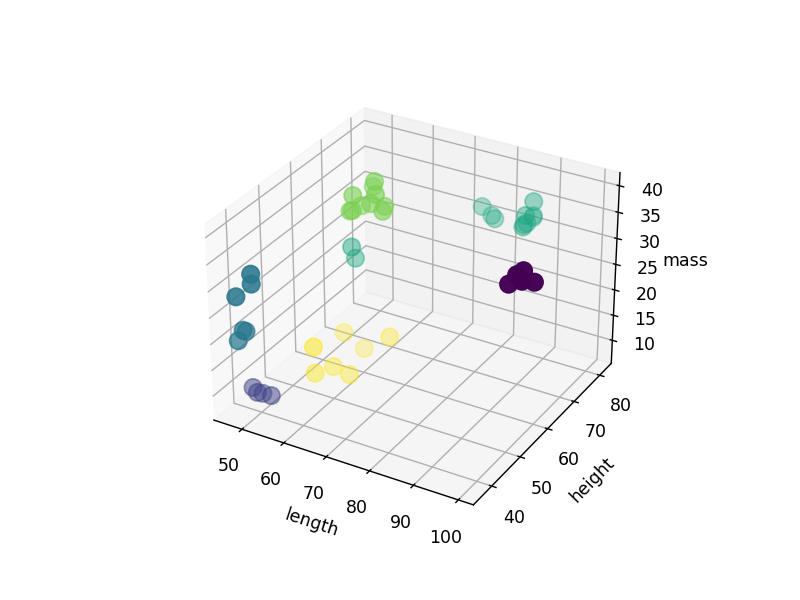

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['length'], X_train['height'], X_train['mass'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('length')
ax.set_ylabel('height')
ax.set_zlabel('mass')
plt.show()

In [8]:
X = breeds[['mass', 'length', 'height']]
y = breeds['breed_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
knn.score(X_test, y_test)

0.9333333333333333

In [12]:
breed_prediction = knn.predict([[37.1, 61.3, 64.5]])
look_up_breed_name[breed_prediction[0]]

C:\Users\asus\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'german shepherd'